### PCW 
1) Number of edges in a complete graph of $n$ nodes: $ \frac{n(n-1)}{2}$

2) Number of edges in a regular graph of $n$ nodes with $k$ degree: $\frac{nk}{2}$


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print(f"networx version: {nx.__version__}") 

networx version: 2.5


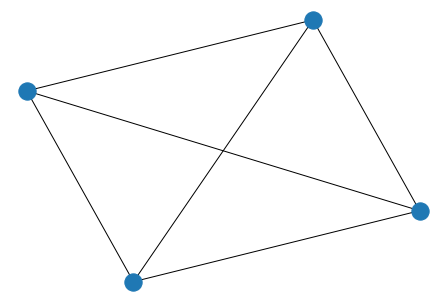

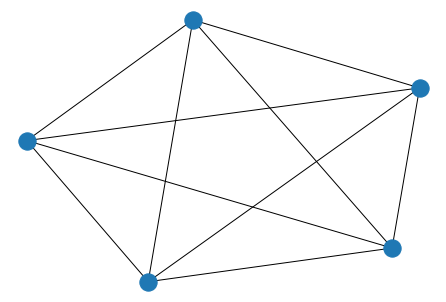

In [ ]:
for n in [4,5]:
    g = nx.complete_graph(n)
    nx.draw(g)
    plt.show()

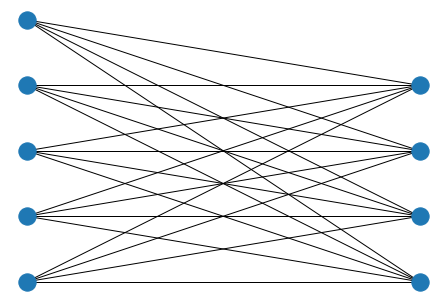

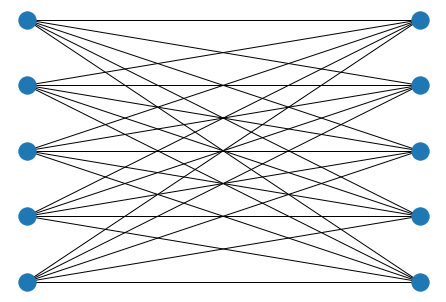

In [ ]:

for _ in range(2):
    no_nodes_L = 5
    no_nodes_R = _+4
    
    lnodes = [i for i in range(no_nodes_L)]
    rnodes = [str(i) for i in range(no_nodes_R)]
    B = nx.Graph()
    B.add_nodes_from(lnodes, bipartite=0) # Add the node attribute "bipartite"
    B.add_nodes_from(rnodes, bipartite=1)
    B.add_edges_from([(i,j) for j in rnodes for i in lnodes])

    # Separate by group
    l, r = nx.bipartite.sets(B)
    pos = {}

    # Update position for node from each group
    pos.update((node, (1, index)) for index, node in enumerate(l))
    pos.update((node, (2, index)) for index, node in enumerate(r))

    nx.draw(B, pos=pos)
    plt.show()

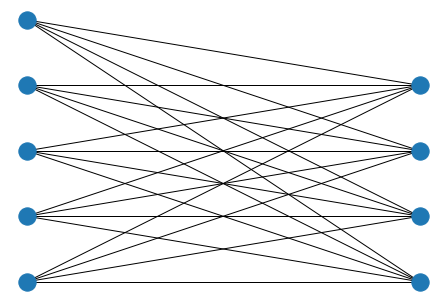

In [ ]:
no_nodes_L = 5
no_nodes_R = +4

lnodes = [i for i in range(no_nodes_L)]
rnodes = [str(i) for i in range(no_nodes_R)]
B = nx.Graph()
B.add_nodes_from(lnodes, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(rnodes, bipartite=1)
B.add_edges_from([(i,j) for j in rnodes for i in lnodes])

# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos)
plt.show()

3) Why every tree graph of $n$ nodes have $n-1$ edges: Because there is only one way to get from any point A to any point B in the tree. This means that all non-root nodes have one edge heading towards the root, and the root not having any, hence $n-1$.

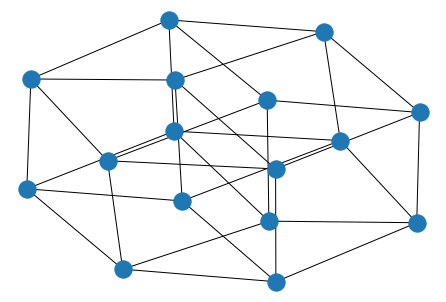

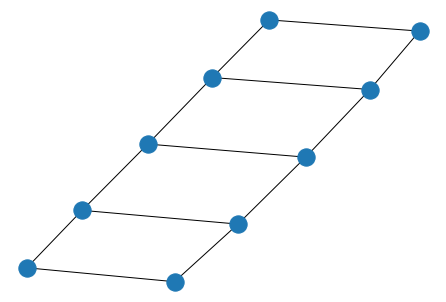

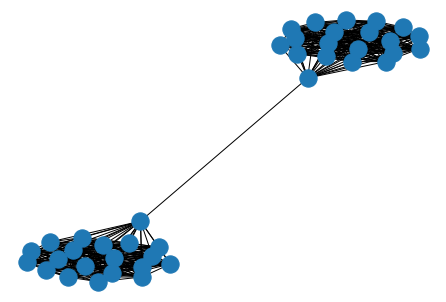

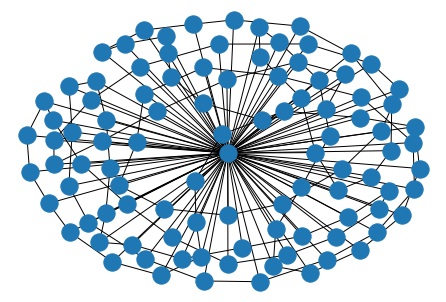

In [ ]:
gs = [nx.hypercube_graph(4),nx.ladder_graph(5),nx.barbell_graph(20,0),nx.wheel_graph(100)]

for g in gs:
    nx.draw(g)
    plt.show()

The hockey case is a bipartite graph because we can conceive the clubs to be something like a hyperedge, where it can connect multiple nodes at once. In this scenario that will simply mean the club will directly be connected to whomever has belonged to it at some point in time.

In [ ]:
n = 10  # Number of nodes in the graph.
# Each node is connected to the two next nodes,
# in a circular fashion.
adj = [(i, (i + 1) % n) for i in range(n)]
adj += [(i, (i + 2) % n) for i in range(n)]

In [ ]:
g = nx.Graph(adj)

In [ ]:
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
print(g.edges())

[(0, 1), (0, 9), (0, 2), (0, 8), (1, 2), (1, 3), (1, 9), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9)]


In [ ]:
print(nx.adjacency_matrix(g))

  (0, 1)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 9)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (6, 8)	1
  (7, 5)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 0)	1
  (8, 6)	1
  (8, 7)	1
  (8, 9)	1
  (9, 0)	1
  (9, 1)	1
  (9, 7)	1
  (9, 8)	1


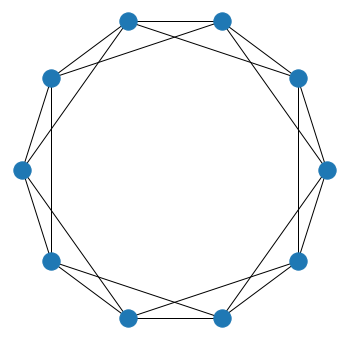

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_circular(g, ax=ax)

In [ ]:
g.add_node(n, color='#fcff00')
# We add an edge from every existing
# node to the new node.
for i in range(n):
    g.add_edge(i, n)

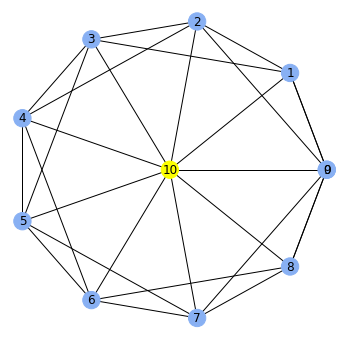

In [ ]:
# We define custom node positions on a circle
# except the last node which is at the center.
t = np.linspace(0., 2 * np.pi, n)
pos = np.zeros((n + 1, 2))
pos[:n, 0] = np.cos(t)
pos[:n, 1] = np.sin(t)

# A node's color is specified by its 'color'
# attribute, or a default color if this attribute
# doesn't exist.
color = [g.nodes[i].get('color', '#88b0f3') for i in range(n + 1)]

# We now draw the graph with matplotlib.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, pos=pos, node_color=color, ax=ax)
ax.set_axis_off()

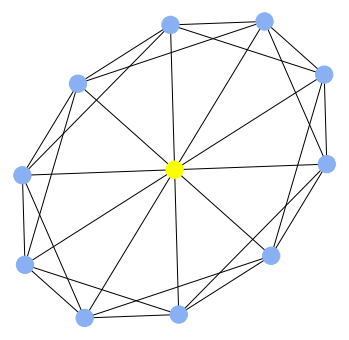

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_spectral(g, node_color=color, ax=ax)
ax.set_axis_off()